# **1. Data Preparation**

## **a. Data Cleaning**

### **i. Loading Data**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


## **ii. Handling missing values**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


## **iii. Removing Duplicates**

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


##  **iii. Text Data Cleaning**

In [ ]:
import re

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply the cleaning function
df['text'] = df['text'].apply(clean_text)


## **iv. Converting Categorical Values**

In [ ]:
# Convert 'label' column to numeric
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df


,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter this is a follow ...,0
1,2349,ham,subject hpl nom for january see attached file ...,0
2,3624,ham,subject neon retreat ho ho ho we re around to ...,0
3,4685,spam,subject photoshop windows office cheap main tr...,1
4,2030,ham,subject re indian springs this deal is to book...,0
...,...,...,...,...
5166,1518,ham,subject put the on the ft the transport volume...,0
5167,404,ham,subject and following noms hpl can t take the ...,0
5168,2933,ham,subject calpine daily gas nomination julie as ...,0
5169,1409,ham,subject industrial worksheets for august activ...,0


# **b. Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split


X = df['text']  # Feature
y = df['label_num']  # Target variable

# Training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **2. Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)


# **3. Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

# **4. Model Evaluation**

Accuracy: 0.98
Precision: 0.96
Recall: 0.97
F1-Score: 0.97
Confusion Matrix:
[[731  11]
 [  8 285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.96      0.97      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



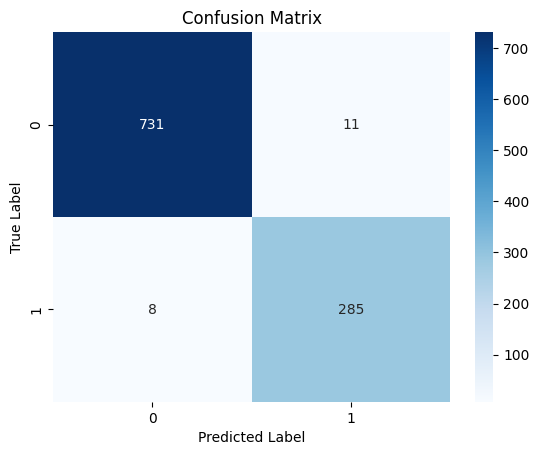

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# **5. Analysing Model Evaluation**

In [ ]:
import numpy as np

# Get feature names and coefficients
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = model.coef_[0]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Print top features
print("Top features affecting spam classification:")
print(feature_importance.head(20))


Top features affecting spam classification:
          Feature  Coefficient
18029        http     2.329870
25569          no     2.209494
17340        here     2.189357
40649        your     1.880603
24527        more     1.836549
24415       money     1.801019
26391        only     1.595193
26128          of     1.537551
34583  statements     1.418199
27025    paliourg     1.387895
7280        click     1.306507
26379      online     1.297133
3859         best     1.262925
23562        meds     1.262156
28946      prices     1.262142
7973    computron     1.260901
31665       rolex     1.184732
30828      remove     1.184687
30829     removed     1.178242
26987        pain     1.150433
